In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'D:\Jupyter\Ground water level prediction(Towfiq Sir)\final_data_Dinajpur_63.xlsx')

df

,Date,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value,"Dinajpur-63 (Tazpur, Chirir Bandar)"
0,01.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
1,02.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
2,03.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
3,04.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
4,05.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9127,28.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9128,29.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9129,30.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800


In [3]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)


# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [4]:
checker.check_missing_values()

No missing values found in DataFrame


In [5]:
print(df.columns)

Index(['Date', 'Dinajpur_Tave', 'Dinajpur_PRCP', 'Dinajpur_NDVI', 'IOD_Value',
       'SOI_Value', 'Nina3.4_Value', 'MEI_Value',
       'Dinajpur-63 (Tazpur, Chirir Bandar)'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 9131 non-null   object 
 1   Dinajpur_Tave                        9131 non-null   float64
 2   Dinajpur_PRCP                        9131 non-null   int64  
 3   Dinajpur_NDVI                        9131 non-null   float64
 4   IOD_Value                            9131 non-null   float64
 5   SOI_Value                            9131 non-null   float64
 6   Nina3.4_Value                        9131 non-null   float64
 7   MEI_Value                            9131 non-null   float64
 8   Dinajpur-63 (Tazpur, Chirir Bandar)  9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [7]:
# Assuming df is your DataFrame
cols_to_convert = df.columns.difference(['Date'])

df[cols_to_convert] = df[cols_to_convert].astype(float)


In [8]:
df["Dinajpur-63 (Tazpur, Chirir Bandar)"].describe()

count    9131.000000
mean        6.229414
std         2.461229
min         1.752500
25%         4.255000
50%         6.155000
75%         8.022500
max        12.157500
Name: Dinajpur-63 (Tazpur, Chirir Bandar), dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 9131 non-null   object 
 1   Dinajpur_Tave                        9131 non-null   float64
 2   Dinajpur_PRCP                        9131 non-null   float64
 3   Dinajpur_NDVI                        9131 non-null   float64
 4   IOD_Value                            9131 non-null   float64
 5   SOI_Value                            9131 non-null   float64
 6   Nina3.4_Value                        9131 non-null   float64
 7   MEI_Value                            9131 non-null   float64
 8   Dinajpur-63 (Tazpur, Chirir Bandar)  9131 non-null   float64
dtypes: float64(8), object(1)
memory usage: 642.1+ KB


In [10]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

df_train = df.loc[df['Date'].dt.year <= 2012]
df_test = df.loc[df['Date'].dt.year >= 2013]

X_train = df_train.drop(columns=['Dinajpur-63 (Tazpur, Chirir Bandar)', 'Date']).to_numpy()
y_train = df_train['Dinajpur-63 (Tazpur, Chirir Bandar)'].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [11]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tbats import TBATS
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.ensemble import AdaBoostRegressor



random_state = 42 

# Initialize different base models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(random_state=random_state)
ridge = Ridge()
knn = KNeighborsRegressor()
gaussian_process = GaussianProcessRegressor()
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_kernel = make_pipeline(StandardScaler(), PolynomialFeatures(3), LinearRegression())
rbf_kernel = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=None, n_restarts_optimizer=10, random_state=random_state))
gpr = GaussianProcessRegressor(random_state=random_state)
weighted_knn = KNeighborsRegressor(weights='distance')
lightgbm = LGBMRegressor(random_state=random_state)
catboost = CatBoostRegressor(random_state=random_state, verbose=0)
xgb_model = XGBRegressor()
lgb_regressor = lgb.LGBMRegressor()
gbr = GradientBoostingRegressor(random_state=random_state)
abr = AdaBoostRegressor(random_state=random_state)


# Train each base model on the training set
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ridge.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
poly_reg.fit(X_train, y_train)
poly_kernel.fit(X_train, y_train)
rbf_kernel.fit(X_train, y_train)
gpr.fit(X_train, y_train)
weighted_knn.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_regressor.fit(X_train, y_train)
gbr.fit(X_train, y_train)
abr.fit(X_train, y_train)


# Train and evaluate Linear Regression
linear_pred_val = linear_regression.predict(X_val)
linear_rmse_val = mean_squared_error(y_val, linear_pred_val, squared=False)
linear_mae_val = mean_absolute_error(y_val, linear_pred_val)
linear_r2_val = r2_score(y_val, linear_pred_val)

# Train and evaluate Decision Tree
dt_pred_val = decision_tree.predict(X_val)
dt_rmse_val = mean_squared_error(y_val, dt_pred_val, squared=False)
dt_mae_val = mean_absolute_error(y_val, dt_pred_val)
dt_r2_val = r2_score(y_val, dt_pred_val)

# Train and evaluate Random Forest
rf_pred_val = random_forest.predict(X_val)
rf_rmse_val = mean_squared_error(y_val, rf_pred_val, squared=False)
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Train and evaluate Ridge Regression
ridge_pred_val = ridge.predict(X_val)
ridge_rmse_val = mean_squared_error(y_val, ridge_pred_val, squared=False)
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)


# Train and evaluate K-Nearest Neighbors
knn_pred_val = knn.predict(X_val)
knn_rmse_val = mean_squared_error(y_val, knn_pred_val, squared=False)
knn_mae_val = mean_absolute_error(y_val, knn_pred_val)
knn_r2_val = r2_score(y_val, knn_pred_val)

# Train and evaluate Gaussian Process
gp_pred_val = gaussian_process.predict(X_val)
gp_rmse_val = mean_squared_error(y_val, gp_pred_val, squared=False)
gp_mae_val = mean_absolute_error(y_val, gp_pred_val)
gp_r2_val = r2_score(y_val, gp_pred_val)


# Train and evaluate Polynomial Regression
poly_reg_pred_val = poly_reg.predict(X_val)
poly_reg_rmse_val = mean_squared_error(y_val, poly_reg_pred_val, squared=False)
poly_reg_mae_val = mean_absolute_error(y_val, poly_reg_pred_val)
poly_reg_r2_val = r2_score(y_val, poly_reg_pred_val)

# Train and evaluate Poly Kernel
poly_kernel_pred_val = poly_kernel.predict(X_val)
poly_kernel_rmse_val = mean_squared_error(y_val, poly_kernel_pred_val, squared=False)
poly_kernel_mae_val = mean_absolute_error(y_val, poly_kernel_pred_val)
poly_kernel_r2_val = r2_score(y_val, poly_kernel_pred_val)

# Train and evaluate RBF Kernel
rbf_kernel_pred_val = rbf_kernel.predict(X_val)
rbf_kernel_rmse_val = mean_squared_error(y_val, rbf_kernel_pred_val, squared=False)
rbf_kernel_mae_val = mean_absolute_error(y_val, rbf_kernel_pred_val)
rbf_kernel_r2_val = r2_score(y_val, rbf_kernel_pred_val)

# Train and evaluate Gaussian Process Regression
gpr_pred_val = gpr.predict(X_val)
gpr_rmse_val = mean_squared_error(y_val, gpr_pred_val, squared=False)
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)

# Train and evaluate Weighted K-NN
wknn_pred_val = weighted_knn.predict(X_val)
wknn_rmse_val = mean_squared_error(y_val, wknn_pred_val, squared=False)
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)

# Train and evaluate Gradient Boosting Regressor
gbr_pred_val = gbr.predict(X_val)
gbr_rmse_val = mean_squared_error(y_val, gbr_pred_val, squared=False)
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)

# Train and evaluate AdaBoost Regressor
abr_pred_val = abr.predict(X_val)
abr_rmse_val = mean_squared_error(y_val, abr_pred_val, squared=False)
abr_mae_val = mean_absolute_error(y_val, abr_pred_val)
abr_r2_val = r2_score(y_val, abr_pred_val)

# Train and evaluate LightGBM Regressor
lightgbm_pred_val = lightgbm.predict(X_val)
lightgbm_rmse_val = mean_squared_error(y_val, lightgbm_pred_val, squared=False)
lightgbm_mae_val = mean_absolute_error(y_val, lightgbm_pred_val)
lightgbm_r2_val = r2_score(y_val, lightgbm_pred_val)

# Train and evaluate CatBoost Regressor
catboost_pred_val = catboost.predict(X_val)
catboost_rmse_val = mean_squared_error(y_val, catboost_pred_val, squared=False)
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)

# Train and evaluate XGBoost
xgb_pred_val = xgb_model.predict(X_val)
xgb_rmse_val = mean_squared_error(y_val, xgb_pred_val, squared=False)
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)

# Train and evaluate LightGBM Regressor
lgb_pred_val = lgb_regressor.predict(X_val)
lgb_rmse_val = mean_squared_error(y_val, lgb_pred_val, squared=False)
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)


# Print evaluation metrics for each model on the validation set

# Print the evaluation metrics for each model
print("Linear Regression RMSE:", linear_rmse_val)
print("Decision Tree RMSE:", dt_rmse_val)
print("Random Forest RMSE:", rf_rmse_val)
print("Ridge Regression RMSE:", ridge_rmse_val)
print("K-Nearest Neighbors RMSE:", knn_rmse_val)
print("Gaussian Process RMSE:", gp_rmse_val)
print("Polynomial Regression RMSE:", poly_reg_rmse_val)
print("Poly Kernel RMSE:", poly_kernel_rmse_val)
print("RBF Kernel RMSE:", rbf_kernel_rmse_val)
print("Gaussian Process Regression RMSE:", gpr_rmse_val)
print("Weighted K-NN RMSE:", wknn_rmse_val)
print("Gradient Boosting Regressor RMSE:", gbr_rmse_val)
print("AdaBoost Regressor RMSE:", abr_rmse_val)
print("LightGBM Regressor RMSE:", lightgbm_rmse_val)
print("CatBoost Regressor RMSE:", catboost_rmse_val)
print("XGBoost RMSE:", xgb_rmse_val)
print("LightGBM Regressor RMSE:", lgb_rmse_val)

print()

print("Linear Regression MAE:", linear_mae_val)
print("Decision Tree MAE:", dt_mae_val)
print("Random Forest MAE:", rf_mae_val)
print("Ridge Regression MAE:", ridge_mae_val)
print("K-Nearest Neighbors MAE:", knn_mae_val)
print("Gaussian Process MAE:", gp_mae_val)
print("Polynomial Regression MAE:", poly_reg_mae_val)
print("Poly Kernel MAE:", poly_kernel_mae_val)
print("RBF Kernel MAE:", rbf_kernel_mae_val)
print("Gaussian Process Regression MAE:", gpr_mae_val)
print("Weighted K-NN MAE:", wknn_mae_val)
print("Gradient Boosting Regressor MAE:", gbr_mae_val)
print("AdaBoost Regressor MAE:", abr_mae_val)
print("LightGBM Regressor MAE:", lightgbm_mae_val)
print("CatBoost Regressor MAE:", catboost_mae_val)
print("XGBoost MAE:", xgb_mae_val)
print("LightGBM Regressor MAE:", lgb_mae_val)

print()

print("Linear Regression R-squared:", linear_r2_val)
print("Decision Tree R-squared:", dt_r2_val)
print("Random Forest R-squared:", rf_r2_val)
print("Ridge Regression R-squared:", ridge_r2_val)
print("K-Nearest Neighbors R-squared:", knn_r2_val)
print("Gaussian Process R-squared:", gp_r2_val)
print("Polynomial Regression R-squared:", poly_reg_r2_val)
print("Poly Kernel R-squared:", poly_kernel_r2_val)
print("RBF Kernel R-squared:", rbf_kernel_r2_val)
print("Gaussian Process Regression R-squared:", gpr_r2_val)
print("Weighted K-NN R-squared:", wknn_r2_val)
print("Gradient Boosting Regressor R-squared:", gbr_r2_val)
print("AdaBoost Regressor R-squared:", abr_r2_val)
print("LightGBM Regressor R-squared:", lightgbm_r2_val)
print("CatBoost Regressor R-squared:", catboost_r2_val)
print("XGBoost R-squared:", xgb_r2_val)
print("LightGBM Regressor R-squared:", lgb_r2_val)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 5844, number of used features: 7
[LightGBM] [Info] Start training from score 5.976829
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 5844, number of used features: 7
[LightGBM] [Info] Start training from score 5.976829
Linear Regression RMSE: 2.3356720651064093
Decision Tree RMSE: 2.0587308084131768e-15
Random Forest RMSE: 9.561840653524125e-15
Ridge Regression RMSE: 2.3356604705892328
K-Nearest Neighbors RMSE: 2.175149562859313e-16
Gaussian Process RMSE: 2.684819805385117e-11
Polynomial Regression RMSE: 1.5623047696866386
Poly Kerne

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of neighbors to consider
num_neighbors = 5  # You can adjust this value

# Initialize LWLR model
lwlr = KNeighborsRegressor(n_neighbors=num_neighbors, weights='distance')

# Train the LWLR model
lwlr.fit(X_train, y_train)

# Predict on validation set
lwlr_pred = lwlr.predict(X_val)

# Calculate metrics for LWLR
lwlr_rmse = mean_squared_error(y_val, lwlr_pred, squared=False)
lwlr_mae = mean_absolute_error(y_val, lwlr_pred)
lwlr_r2 = r2_score(y_val, lwlr_pred)

# Print the evaluation metrics for LWLR
print("LWLR RMSE:", lwlr_rmse)
print("LWLR MAE:", lwlr_mae)
print("LWLR R-squared:", lwlr_r2)

LWLR RMSE: 2.175149562859313e-16
LWLR MAE: 6.595986210640902e-17
LWLR R-squared: 1.0


Based on the evaluation metrics provided, here are the 12 best models, ranked by RMSE, MAE, and R-squared values:

1. Random Forest Regressor (RMSE: 4.5129170688300314e-15, MAE: 3.731747590232183e-15, R-squared: 1.0)
2. lwlr
3. Poly Kernel Regression (RMSE: 1.6127342607400202e-14, MAE: 1.2373097451168137e-14, R-squared: 1.0)
4. RBF Kernel Regression (RMSE: 8.402295816463806e-12, MAE: 7.30005059367716e-12, R-squared: 1.0)
5. Gaussian Process Regression (RMSE: 1.3658267901830649e-11, MAE: 1.321696512977017e-11, R-squared: 1.0)
6. Weighted K-Nearest Neighbors (RMSE: 1.6151202582352662e-16, MAE: 6.094448088633645e-17, R-squared: 1.0)
7. K-Nearest Neighbors (RMSE: 1.6151202582352662e-16, MAE: 6.094448088633645e-17, R-squared: 1.0)
8. XGBoost Regressor (RMSE: 0.0001604180170547465, MAE: 0.00012571969879465955, R-squared: 0.9999999418520767)
9. CatBoost Regressor (RMSE: 0.0004191192864975924, MAE: 0.00033127405418021457, R-squared: 0.9999996030797887)
10. LightGBM Regressor (RMSE: 0.0032090330540582293, MAE: 0.002630020414763086, R-squared: 0.9999767310759211)
11. Gradient Boosting Regressor (RMSE: 0.2065918821936626, MAE: 0.16683381944876388, R-squared: 0.9035606162870705)
12. Ridge Regression (RMSE: 0.525636725173341, MAE: 0.429759090595957, R-squared: 0.37569139148812536)

# Hyper parameter tuning

## Random Forest Regressor HPT

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Random Forest model
random_forest = RandomForestRegressor()

# Define the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # You can adjust these values
    'max_depth': [None, 5, 10],      # You can adjust these values
    'min_samples_split': [2, 5, 10] # You can adjust these values
}

# Initialize Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predict on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculate metrics for Random Forest on validation set
rf_rmse_val = mean_squared_error(y_val, rf_pred_val, squared=False)
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Print the best hyperparameters and evaluation metrics for Random Forest on validation set
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest RMSE (Validation): 4.433396897366559e-15
Random Forest MAE (Validation): 3.4920731604123508e-15
Random Forest R-squared (Validation): 1.0


## 2. LWLR HPT

# lwlr doesn't need hyper parameter tuning

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of neighbors to consider
param_grid_lwlr = {
    'n_neighbors': [3, 5, 7],  # You can adjust these values
    'weights': ['uniform', 'distance']  # You can adjust these values
}

# Initialize LWLR model
lwlr = KNeighborsRegressor()

# Initialize Grid Search for LWLR
grid_search_lwlr = GridSearchCV(lwlr, param_grid_lwlr, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for LWLR
grid_search_lwlr.fit(X_train, y_train)

# Get the best hyperparameters and model for LWLR
best_lwlr = grid_search_lwlr.best_estimator_
best_params_lwlr = grid_search_lwlr.best_params_

# Predict on validation set using LWLR
lwlr_pred_val = best_lwlr.predict(X_val)

# Calculate metrics for LWLR on validation set
lwlr_rmse_val = mean_squared_error(y_val, lwlr_pred_val, squared=False)
lwlr_mae_val = mean_absolute_error(y_val, lwlr_pred_val)
lwlr_r2_val = r2_score(y_val, lwlr_pred_val)

# Print the best hyperparameters and evaluation metrics for LWLR on validation set
print("Best Hyperparameters for LWLR:", best_params_lwlr)
print("LWLR RMSE (Validation):", lwlr_rmse_val)
print("LWLR MAE (Validation):", lwlr_mae_val)
print("LWLR R-squared (Validation):", lwlr_r2_val)

Best Hyperparameters for LWLR: {'n_neighbors': 5, 'weights': 'uniform'}
LWLR RMSE (Validation): 2.175149562859313e-16
LWLR MAE (Validation): 6.595986210640902e-17
LWLR R-squared (Validation): 1.0


## 3. Gaussian Process Regression HPT

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)]   
    
}

# Initialize Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predict on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculate metrics for Gaussian Process Regression on validation set
gpr_rmse_val = mean_squared_error(y_val, gpr_pred_val, squared=False)
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)

# Print the best hyperparameters and evaluation metrics for Gaussian Process Regression on validation set
print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)

Best Hyperparameters for Gaussian Process Regression: {'kernel': None}
Gaussian Process RMSE (Validation): 2.684819805385117e-11
Gaussian Process MAE (Validation): 2.4366272023872073e-11
Gaussian Process R-squared (Validation): 1.0


## 4. Weighted K-Nearest Neighbors HPT

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9,11],  # Adjust as needed
    'weights': ['uniform', 'distance'],  # These are the most common, but you can explore other weighting options if available
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 30, 50],  # Leaf size for tree-based algorithms
    'p': [1, 2],  # Power parameter for the Minkowski metric
    'metric': ['euclidean', 'manhattan']  #
}

# Initialize Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Get the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predict on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculate metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = mean_squared_error(y_val, wknn_pred_val, squared=False)
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)

# Print the best hyperparameters and evaluation metrics for Weighted K-Nearest Neighbors on validation set
print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)


Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Weighted K-NN RMSE (Validation): 1.9064392430531507e-16
Weighted K-NN MAE (Validation): 4.665824347158426e-17
Weighted K-NN R-squared (Validation): 1.0


## 5. K-Nearest Neighbors HPT

### The KNeighborsRegressor (KNN) model doesn't have traditional hyperparameters like other models (e.g., Random Forest).However, I performed hyperparameter tuning for the Locally Weighted Linear Regression (LWLR) using Grid Search with a specified range of neighbors and weight options, ultimately finding the best hyperparameters and model for LWLR, and evaluating its performance on the validation set.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of neighbors and weights to consider
param_grid = {
     'n_neighbors': [3, 5, 7, 9,11],  # Adjust as needed
    'weights': ['uniform', 'distance'],  # These are the most common, but you can explore other weighting options if available
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 30, 50],  # Leaf size for tree-based algorithms
    'p': [1, 2],  # Power parameter for the Minkowski metric
    'metric': ['euclidean', 'manhattan'] 
}

# Initialize KNN model
knn = KNeighborsRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Predict on validation set
knn_pred = best_knn.predict(X_val)

# Calculate metrics for KNN
knn_rmse = mean_squared_error(y_val, knn_pred, squared=False)
knn_mae = mean_absolute_error(y_val, knn_pred)
knn_r2 = r2_score(y_val, knn_pred)

# Print the best hyperparameters and evaluation metrics for KNN
print("Best Hyperparameters for KNN:", best_params)
print("KNN RMSE:", knn_rmse)
print("KNN MAE:", knn_mae)
print("KNN R-squared:", knn_r2)

Best Hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
KNN RMSE: 1.9064392430531507e-16
KNN MAE: 4.665824347158426e-17
KNN R-squared: 1.0


## 6. XGBoost Regressor HPT

In [18]:
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  # Adjust the number of iterations as needed
    random_state=42,  # Set a seed for reproducibility
    n_jobs=-1,  # Use multiple cores for parallelization
    verbose=1,  # Print progress
    n_points=5,  # Number of points to sample in each iteration
    refit=True  # Refit the best estimator with the entire dataset
)

# Perform Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predict on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculate metrics for XGBoost Regressor on validation set
xgb_rmse_val = mean_squared_error(y_val, xgb_pred_val, squared=False)
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)

# Print the best hyperparameters and evaluation metrics for XGBoost Regressor on validation set
print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])
XGBoost RMSE (Validation): 0.0361283714430582
XGBoost MAE (Validation): 0.028278647646312317
XGBoost R-squared (Validation): 0.9997854122265006


## 7. CatBoost Regressor  HPT

In [19]:
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  # Adjust the number of iterations as needed
    random_state=42,  # Set a seed for reproducibility
    n_jobs=-1,  # Use multiple cores for parallelization
    verbose=1,  # Print progress
    n_points=5,  # Number of points to sample in each iteration
    refit=True  # Refit the best estimator with the entire dataset
)

# Perform Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Get the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predict on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculate metrics for CatBoost Regressor on validation set
catboost_rmse_val = mean_squared_error(y_val, catboost_pred_val, squared=False)
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)

# Print the best hyperparameters and evaluation metrics for CatBoost Regressor on validation set
print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])
CatBoost RMSE (Validation): 0.0003211822013442689
CatBoost MAE (Validation): 0.0002514015084798714
CatBoost R-squared (Validation): 0.9999999830405742


## 8. LightGBM Regressor HPT

In [20]:
from lightgbm import LGBMRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1),  # Set verbosity to -1 to suppress warnings
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  # Adjust the number of iterations as needed
    random_state=42,  # Set a seed for reproducibility
    n_jobs=-1,  # Use multiple cores for parallelization
    verbose=1,  # Print progress
    n_points=5,  # Number of points to sample in each iteration
    refit=True  # Refit the best estimator with the entire dataset
)

# Perform Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Get the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predict on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculate metrics for LightGBM Regressor on validation set
lgb_rmse_val = mean_squared_error(y_val, lgb_pred_val, squared=False)
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)

# Print the best hyperparameters and evaluation metrics for LightGBM Regressor on validation set
print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)
print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Validation): 0.004854142059489787
LightGBM MAE (Validation): 0.003854183214095275
LightGBM R-squared (Validation): 0.9999961262359256


## 9. Gradient Boosting Regressor HPT

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  # Adjust the number of iterations as needed
    random_state=42,  # Set a seed for reproducibility
    n_jobs=-1,  # Use multiple cores for parallelization
    verbose=1,  # Print progress
    n_points=5,  # Number of points to sample in each iteration
    refit=True  # Refit the best estimator with the entire dataset
)

# Perform Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predict on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculate metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = mean_squared_error(y_val, gbr_pred_val, squared=False)
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)

# Print the best hyperparameters and evaluation metrics for Gradient Boosting Regressor on validation set
print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
Gradient Boosting RMSE (Validation): 0.004385779756715549
Gradient Boosting MAE (Validation): 0.00333482386465744
Gradient Boosting R-squared (Validation): 0.9999968377089395


## 10.Ridge Regression HPT

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hyperparameters and their possible values for Ridge Regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initialize Ridge model
ridge = Ridge(max_iter=10000)

# Initialize Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_
best_params_ridge = grid_search_ridge.best_params_

# Predict on validation set using Ridge Regression
ridge_pred = best_ridge.predict(X_val)

# Calculate metrics for Ridge Regression
ridge_rmse = mean_squared_error(y_val, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_val, ridge_pred)
ridge_r2 = r2_score(y_val, ridge_pred)

# Print the best hyperparameters and evaluation metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", best_params_ridge)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R-squared:", ridge_r2)

Best Hyperparameters for Ridge Regression: {'alpha': 1, 'solver': 'sparse_cg'}
Ridge Regression RMSE: 2.335660743652853
Ridge Regression MAE: 1.9771172362478087
Ridge Regression R-squared: 0.10313365806649555


# Hybrid models

In [23]:
import numpy as np

# Define the weighted average ensemble
def weighted_average_ensemble(models, weights, X):
    predictions = np.column_stack([model.predict(X) for model in models])
    weighted_predictions = np.sum(predictions * weights, axis=1) / np.sum(weights)
    return weighted_predictions

# Define the models and their corresponding weights for the ensemble
models = [best_rf, best_lwlr, best_gpr, best_wknn, best_xgb, best_catboost, best_gbr, best_ridge]
weights = [1, 1, 1, 1, 1, 1, 1, 1]  # Adjust weights as needed

# Predict on the validation set using the ensemble
ensemble_pred_val = weighted_average_ensemble(models, weights, X_val)

# Calculate metrics for the ensemble on the validation set
ensemble_rmse_val = mean_squared_error(y_val, ensemble_pred_val, squared=False)
ensemble_mae_val = mean_absolute_error(y_val, ensemble_pred_val)
ensemble_r2_val = r2_score(y_val, ensemble_pred_val)

# Print evaluation metrics for the ensemble
print("Ensemble RMSE (Validation):", ensemble_rmse_val)
print("Ensemble MAE (Validation):", ensemble_mae_val)
print("Ensemble R-squared (Validation):", ensemble_r2_val)

Ensemble RMSE (Validation): 0.29491001712186776
Ensemble MAE (Validation): 0.24961388629225598
Ensemble R-squared (Validation): 0.9857016062766933


In [24]:
# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Create hybrid predictions
hybrid_pred_val = (
    weight_rf * rf_pred_val +
    weight_lwlr * lwlr_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_knn * knn_pred_val +
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_lgb * lgb_pred_val +
    weight_gbr * gbr_pred_val +
    weight_ridge * ridge_pred_val
)

# Calculate metrics for the hybrid model on validation set
hybrid_rmse_val = mean_squared_error(y_val, hybrid_pred_val, squared=False)
hybrid_mae_val = mean_absolute_error(y_val, hybrid_pred_val)
hybrid_r2_val = r2_score(y_val, hybrid_pred_val)

# Print evaluation metrics for the hybrid model on validation set
print("Hybrid RMSE (Validation):", hybrid_rmse_val)
print("Hybrid MAE (Validation):", hybrid_mae_val)
print("Hybrid R-squared (Validation):", hybrid_r2_val)

Hybrid RMSE (Validation): 0.3757034778292425
Hybrid MAE (Validation): 0.30197470080440025
Hybrid R-squared (Validation): 0.9767940883980049


In [25]:
# Assuming you already have predictions for gbr_pred_val and catboost_pred_val
hybrid4_pred_val = (gbr_pred_val + catboost_pred_val) / 2

# Evaluate the performance of Hybrid Model 4
hybrid4_rmse_val = mean_squared_error(y_val, hybrid4_pred_val, squared=False)
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)

print("Hybrid Model 4 (GBR + CatBoost) RMSE:", hybrid4_rmse_val)
print("Hybrid Model 4 (GBR + CatBoost) MAE:", hybrid4_mae_val)
print("Hybrid Model 4 (GBR + CatBoost) R-squared:", hybrid4_r2_val)


Hybrid Model 4 (GBR + CatBoost) RMSE: 0.002297836039710254
Hybrid Model 4 (GBR + CatBoost) MAE: 0.0017461684312808378
Hybrid Model 4 (GBR + CatBoost) R-squared: 0.9999991319469319


In [26]:
# Assuming you already have predictions for ridge_pred_val and lwlr_pred_val
hybrid4_pred_val = (ridge_pred_val + lwlr_pred_val) / 2

# Calculate metrics for the hybrid model on validation set
hybrid4_rmse_val = mean_squared_error(y_val, hybrid4_pred_val, squared=False)
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)

# Print evaluation metrics for Hybrid Model 4
print("Hybrid Model 4 (Ridge + LWLR) RMSE:", hybrid4_rmse_val)
print("Hybrid Model 4 (Ridge + LWLR) MAE:", hybrid4_mae_val)
print("Hybrid Model 4 (Ridge + LWLR) R-squared:", hybrid4_r2_val)


Hybrid Model 4 (Ridge + LWLR) RMSE: 1.1678302352946164
Hybrid Model 4 (Ridge + LWLR) MAE: 0.9885584228861105
Hybrid Model 4 (Ridge + LWLR) R-squared: 0.7757834669432351


In [27]:
# Assuming you already have predictions for rf_pred_val, lwlr_pred_val, gpr_pred_val, and wknn_pred_val
hybrid4_pred_val = (rf_pred_val + lwlr_pred_val + gpr_pred_val + wknn_pred_val) / 4

# Calculate metrics for the hybrid model on validation set
hybrid4_rmse_val = mean_squared_error(y_val, hybrid4_pred_val, squared=False)
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)

# Print evaluation metrics for Hybrid Model 4
print("Hybrid Model 4 (RF + LWLR + GPR + WKNN) RMSE:", hybrid4_rmse_val)
print("Hybrid Model 4 (RF + LWLR + GPR + WKNN) MAE:", hybrid4_mae_val)
print("Hybrid Model 4 (RF + LWLR + GPR + WKNN) R-squared:", hybrid4_r2_val)


Hybrid Model 4 (RF + LWLR + GPR + WKNN) RMSE: 6.7121351652447555e-12
Hybrid Model 4 (RF + LWLR + GPR + WKNN) MAE: 6.0916610564877756e-12
Hybrid Model 4 (RF + LWLR + GPR + WKNN) R-squared: 1.0


In [28]:
# Assuming you already have predictions for xgb_pred_val, catboost_pred_val, gbr_pred_val, and ridge_pred_val
hybrid4_pred_val = (xgb_pred_val + catboost_pred_val + gbr_pred_val + ridge_pred_val) / 4

# Calculate metrics for the hybrid model on validation set
hybrid4_rmse_val = mean_squared_error(y_val, hybrid4_pred_val, squared=False)
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)

# Print evaluation metrics for Hybrid Model 4
print("Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) RMSE:", hybrid4_rmse_val)
print("Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) MAE:", hybrid4_mae_val)
print("Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) R-squared:", hybrid4_r2_val)


Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) RMSE: 0.5898199677464132
Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) MAE: 0.4992276778165312
Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) R-squared: 0.9428064380029763


In [29]:
# Assuming you already have predictions for rf_pred_val and lwlr_pred_val
hybrid6_pred_val = (rf_pred_val + lwlr_pred_val) / 2

# Evaluate the performance of Hybrid Model 6
hybrid6_rmse_val = mean_squared_error(y_val, hybrid6_pred_val, squared=False)
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)

print("Hybrid Model 6 (Random Forest + LWLR) RMSE:", hybrid6_rmse_val)
print("Hybrid Model 6 (Random Forest + LWLR) MAE:", hybrid6_mae_val)
print("Hybrid Model 6 (Random Forest + LWLR) R-squared:", hybrid6_r2_val)

Hybrid Model 6 (Random Forest + LWLR) RMSE: 2.2670707265938692e-15
Hybrid Model 6 (Random Forest + LWLR) MAE: 1.7523438020435393e-15
Hybrid Model 6 (Random Forest + LWLR) R-squared: 1.0


In [30]:
# Assuming you have rf_pred_val, lgb_pred_val, and catboost_pred_val

# Define weights for models (you can adjust these)
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

# Combine predictions
hybrid7_pred = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val)

# Evaluate the performance of Hybrid Model 7
hybrid7_rmse = mean_squared_error(y_val, hybrid7_pred, squared=False)
hybrid7_mae = mean_absolute_error(y_val, hybrid7_pred)
hybrid7_r2 = r2_score(y_val, hybrid7_pred)

print("Hybrid Model 7 (RF + LightGBM + CatBoost) RMSE:", hybrid7_rmse)
print("Hybrid Model 7 (RF + LightGBM + CatBoost) MAE:", hybrid7_mae)
print("Hybrid Model 7 (RF + LightGBM + CatBoost) R-squared:", hybrid7_r2)


Hybrid Model 7 (RF + LightGBM + CatBoost) RMSE: 0.0015259835649830537
Hybrid Model 7 (RF + LightGBM + CatBoost) MAE: 0.0012100372928356168
Hybrid Model 7 (RF + LightGBM + CatBoost) R-squared: 0.9999996171682792


In [31]:
from sklearn.linear_model import LinearRegression

# Assuming you have xgb_pred_val, gbr_pred_val, and lgb_pred_val

# Initialize the Meta-model (you can choose a different one if desired)
meta_model = LinearRegression()

# Create the training set for the meta-model
meta_X_train = np.column_stack((xgb_pred_val, gbr_pred_val, lgb_pred_val))

# Train the Meta-model
meta_model.fit(meta_X_train, y_val)

# Create the test set for the meta-model
meta_X_val = np.column_stack((xgb_pred_val, gbr_pred_val, lgb_pred_val))

# Predict using the Meta-model
hybrid8_pred = meta_model.predict(meta_X_val)

# Evaluate the performance of Hybrid Model 8
hybrid8_rmse = mean_squared_error(y_val, hybrid8_pred, squared=False)
hybrid8_mae = mean_absolute_error(y_val, hybrid8_pred)
hybrid8_r2 = r2_score(y_val, hybrid8_pred)

print("Hybrid Model 8 (Stacking Ensemble) RMSE:", hybrid8_rmse)
print("Hybrid Model 8 (Stacking Ensemble) MAE:", hybrid8_mae)
print("Hybrid Model 8 (Stacking Ensemble) R-squared:", hybrid8_r2)


Hybrid Model 8 (Stacking Ensemble) RMSE: 0.0026718954620551785
Hybrid Model 8 (Stacking Ensemble) MAE: 0.0019770094236301336
Hybrid Model 8 (Stacking Ensemble) R-squared: 0.9999988263269626


In [32]:
# Assuming you have predictions from all your tuned models stored in variables
# rf_pred_val, lwlr_pred_val, poly_kernel_pred_val, rbf_kernel_pred_val, gpr_pred_val, wknn_pred_val, knn_pred_val, xgb_pred_val, catboost_pred_val, lgb_pred_val, gbr_pred_val, ridge_pred_val

# Define weights for each model (you can adjust these)
weights = {
    'rf': 0.1,
    'lwlr': 0.1,
    'gpr': 0.1,
    'wknn': 0.1,
    'knn': 0.1,
    'xgb': 0.1,
    'catboost': 0.1,
    'lgb': 0.1,
    'gbr': 0.1,
    'ridge': 0.1
}

# List of model predictions
predictions = [
    rf_pred_val, lwlr_pred_val, 
    gpr_pred_val, wknn_pred_val, knn_pred_val, xgb_pred_val, catboost_pred_val,
    lgb_pred_val, gbr_pred_val, ridge_pred_val
]

# Initialize an array to store the weighted predictions
weighted_predictions = np.zeros_like(rf_pred_val)

# Combine predictions with weights
for model_pred, weight in zip(predictions, weights.values()):
    weighted_predictions += model_pred * weight

# Calculate metrics for the weighted predictions
weighted_rmse_val = mean_squared_error(y_val, weighted_predictions, squared=False)
weighted_mae_val = mean_absolute_error(y_val, weighted_predictions)
weighted_r2_val = r2_score(y_val, weighted_predictions)

# Print the evaluation metrics for the weighted predictions
print("Weighted Average RMSE (Validation):", weighted_rmse_val)
print("Weighted Average MAE (Validation):", weighted_mae_val)
print("Weighted Average R-squared (Validation):", weighted_r2_val)


Weighted Average RMSE (Validation): 0.23616565247013227
Weighted Average MAE (Validation): 0.19988505717799593
Weighted Average R-squared (Validation): 0.9908305840780741


# Testing using test set

In [33]:
X_test = df.loc[(df['Date'].dt.year >= 1993) & (df['Date'].dt.year <= 2012)].drop(columns=['Dinajpur-63 (Tazpur, Chirir Bandar)', 'Date']).to_numpy()
y_test = df.loc[(df['Date'].dt.year >= 1993) & (df['Date'].dt.year <= 2012)]['Dinajpur-63 (Tazpur, Chirir Bandar)'].to_numpy()

In [34]:
# Assuming you already have the hybrid model (hybrid5_pred_val) and X_test, y_test from the previous cell

# Predict on the test set using the hybrid model
hybrid5_pred_test = (best_xgb.predict(X_test) + best_catboost.predict(X_test) + best_gbr.predict(X_test) + best_ridge.predict(X_test)) / 4

# Calculate metrics for the hybrid model on the test set
hybrid5_rmse_test = mean_squared_error(y_test, hybrid5_pred_test, squared=False)
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)

# Print evaluation metrics for the hybrid model on the test set
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test):", hybrid5_r2_test)


Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test): 0.582837694828514
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test): 0.49278981004680544
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test): 0.94230310525982


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have predictions for each best model on the test set
# e.g., best_rf_pred_test, best_lwlr_pred_test, etc.

# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.1
weight_ridge = 0.05

# Assuming you have predictions for each best model on the test set (e.g., best_rf_pred_test, best_lwlr_pred_test, etc.)
best_rf_pred_test = best_rf.predict(X_test)
best_lwlr_pred_test = best_lwlr.predict(X_test)
best_gpr_pred_test = best_gpr.predict(X_test)
best_wknn_pred_test = best_wknn.predict(X_test)
best_knn_pred_test = best_knn.predict(X_test)
best_xgb_pred_test = best_xgb.predict(X_test)
best_catboost_pred_test = best_catboost.predict(X_test)
best_lgb_pred_test = best_lgb.predict(X_test)
best_gbr_pred_test = best_gbr.predict(X_test)
best_ridge_pred_test = best_ridge.predict(X_test)

# Create hybrid predictions for the test set
hybrid_pred_test = (
    weight_rf * best_rf_pred_test +
    weight_lwlr * best_lwlr_pred_test +
    weight_gpr * best_gpr_pred_test +
    weight_wknn * best_wknn_pred_test +
    weight_knn * best_knn_pred_test +
    weight_xgb * best_xgb_pred_test +
    weight_catboost * best_catboost_pred_test +
    weight_lgb * best_lgb_pred_test +
    weight_gbr * best_gbr_pred_test +
    weight_ridge * best_ridge_pred_test
)

# Calculate metrics for the hybrid model on the test set
hybrid_rmse_test = mean_squared_error(y_test, hybrid_pred_test, squared=False)
hybrid_mae_test = mean_absolute_error(y_test, hybrid_pred_test)
hybrid_r2_test = r2_score(y_test, hybrid_pred_test)

# Print evaluation metrics for the hybrid model on the test set
print("Hybrid RMSE (Test):", hybrid_rmse_test)
print("Hybrid MAE (Test):", hybrid_mae_test)
print("Hybrid R-squared (Test):", hybrid_r2_test)


Hybrid RMSE (Test): 0.11677549707601438
Hybrid MAE (Test): 0.09873161379612694
Hybrid R-squared (Test): 0.9976838823001072


In [36]:
# Assuming you have trained models: best_gbr and best_catboost

# Predict on the test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Predict on the test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

# Assuming you already have predictions for gbr_pred_test and catboost_pred_test
hybrid4_pred_test = (gbr_pred_test + catboost_pred_test) / 2

# Evaluate the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = mean_squared_error(y_test, hybrid4_pred_test, squared=False)
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)

print("Hybrid Model 4 (GBR + CatBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (GBR + CatBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (GBR + CatBoost) R-squared (Test):", hybrid4_r2_test)


Hybrid Model 4 (GBR + CatBoost) RMSE (Test): 0.0022462163790758537
Hybrid Model 4 (GBR + CatBoost) MAE (Test): 0.0017110281138661072
Hybrid Model 4 (GBR + CatBoost) R-squared (Test): 0.9999991430403853


In [37]:
# Predict on the test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Predict on the test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

# Assuming you already have predictions for gbr_pred_test and catboost_pred_test
hybrid4_pred_test = (gbr_pred_test + catboost_pred_test) / 2

# Evaluate the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = mean_squared_error(y_test, hybrid4_pred_test, squared=False)
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)

print("Hybrid Model 4 (GBR + CatBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (GBR + CatBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (GBR + CatBoost) R-squared (Test):", hybrid4_r2_test)


Hybrid Model 4 (GBR + CatBoost) RMSE (Test): 0.0022462163790758537
Hybrid Model 4 (GBR + CatBoost) MAE (Test): 0.0017110281138661072
Hybrid Model 4 (GBR + CatBoost) R-squared (Test): 0.9999991430403853


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have trained models: best_ridge and best_lwlr

# Predict on the test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

# Assuming you already have predictions for ridge_pred_test and lwlr_pred_test
hybrid4_pred_test = (ridge_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model on test set
hybrid4_rmse_test = mean_squared_error(y_test, hybrid4_pred_test, squared=False)
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)

# Print evaluation metrics for Hybrid Model 4
print("Hybrid Model 4 (Ridge + LWLR) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (Ridge + LWLR) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (Ridge + LWLR) R-squared (Test):", hybrid4_r2_test)


Hybrid Model 4 (Ridge + LWLR) RMSE (Test): 1.154466766388847
Hybrid Model 4 (Ridge + LWLR) MAE (Test): 0.9762296497239131
Hybrid Model 4 (Ridge + LWLR) R-squared (Test): 0.7736293869120618


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have trained models: best_rf, best_lwlr, best_gpr, and best_wknn

# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

# Predict on the test set using Gaussian Process Regressor
gpr_pred_test = best_gpr.predict(X_test)

# Predict on the test set using Weighted k-Nearest Neighbors Regressor
wknn_pred_test = best_wknn.predict(X_test)

# Assuming you already have predictions for rf_pred_test, lwlr_pred_test, gpr_pred_test, and wknn_pred_test
hybrid4_pred_test = (rf_pred_test + lwlr_pred_test + gpr_pred_test + wknn_pred_test) / 4

# Calculate metrics for the hybrid model on test set
hybrid4_rmse_test = mean_squared_error(y_test, hybrid4_pred_test, squared=False)
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)

# Print evaluation metrics for Hybrid Model 4
print("Hybrid Model 4 (RF + LWLR + GPR + WKNN) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (RF + LWLR + GPR + WKNN) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (RF + LWLR + GPR + WKNN) R-squared (Test):", hybrid4_r2_test)

Hybrid Model 4 (RF + LWLR + GPR + WKNN) RMSE (Test): 6.526947203988966e-12
Hybrid Model 4 (RF + LWLR + GPR + WKNN) MAE (Test): 5.943650621489723e-12
Hybrid Model 4 (RF + LWLR + GPR + WKNN) R-squared (Test): 1.0


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have trained models: best_xgb, best_catboost, best_gbr, and best_ridge

# Predict on the test set using XGBoost Regressor
xgb_pred_test = best_xgb.predict(X_test)

# Predict on the test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

# Predict on the test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Predict on the test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Assuming you already have predictions for xgb_pred_test, catboost_pred_test, gbr_pred_test, and ridge_pred_test
hybrid4_pred_test = (xgb_pred_test + catboost_pred_test + gbr_pred_test + ridge_pred_test) / 4

# Calculate metrics for the hybrid model on test set
hybrid4_rmse_test = mean_squared_error(y_test, hybrid4_pred_test, squared=False)
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)

# Print evaluation metrics for Hybrid Model 4
print("Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) R-squared (Test):", hybrid4_r2_test)


Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) RMSE (Test): 0.582837694828514
Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) MAE (Test): 0.49278981004680544
Hybrid Model 4 (XGB + CatBoost + GBR + Ridge) R-squared (Test): 0.94230310525982


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have trained models: best_rf and best_lwlr

# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

# Assuming you already have predictions for rf_pred_test and lwlr_pred_test
hybrid6_pred_test = (rf_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model on test set
hybrid6_rmse_test = mean_squared_error(y_test, hybrid6_pred_test, squared=False)
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)

# Print evaluation metrics for Hybrid Model 6
print("Hybrid Model 6 (Random Forest + LWLR) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (Random Forest + LWLR) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (Random Forest + LWLR) R-squared (Test):", hybrid6_r2_test)


Hybrid Model 6 (Random Forest + LWLR) RMSE (Test): 2.269326255405916e-15
Hybrid Model 6 (Random Forest + LWLR) MAE (Test): 1.7494865545605889e-15
Hybrid Model 6 (Random Forest + LWLR) R-squared (Test): 1.0


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have rf_pred_val, lgb_pred_val, and catboost_pred_val

# Define weights for models (you can adjust these)
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

# Combine predictions
hybrid7_pred = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val)

# Evaluate the performance of Hybrid Model 7
hybrid7_rmse = mean_squared_error(y_val, hybrid7_pred, squared=False)
hybrid7_mae = mean_absolute_error(y_val, hybrid7_pred)
hybrid7_r2 = r2_score(y_val, hybrid7_pred)

print("Hybrid Model 7 (RF + LightGBM + CatBoost) RMSE:", hybrid7_rmse)
print("Hybrid Model 7 (RF + LightGBM + CatBoost) MAE:", hybrid7_mae)
print("Hybrid Model 7 (RF + LightGBM + CatBoost) R-squared:", hybrid7_r2)


Hybrid Model 7 (RF + LightGBM + CatBoost) RMSE: 0.0015259835649830537
Hybrid Model 7 (RF + LightGBM + CatBoost) MAE: 0.0012100372928356168
Hybrid Model 7 (RF + LightGBM + CatBoost) R-squared: 0.9999996171682792


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have predictions for xgb_pred_test, gbr_pred_test, and lgb_pred_test

# Predict on the test set using XGBoost Regressor
xgb_pred_test = best_xgb.predict(X_test)

# Predict on the test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Predict on the test set using LightGBM Regressor
lgb_pred_test = best_lgb.predict(X_test)


# Initialize the Meta-model (Random Forest Regressor)
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the training set for the meta-model
meta_X_train = np.column_stack((xgb_pred_val, gbr_pred_val, lgb_pred_val))

# Train the Meta-model
meta_model.fit(meta_X_train, y_val)

# Create the test set for the meta-model
meta_X_test = np.column_stack((xgb_pred_test, gbr_pred_test, lgb_pred_test))

# Predict using the Meta-model
hybrid8_pred_test = meta_model.predict(meta_X_test)

# Evaluate the performance of Hybrid Model 8 on the test set
hybrid8_rmse_test = mean_squared_error(y_test, hybrid8_pred_test, squared=False)
hybrid8_mae_test = mean_absolute_error(y_test, hybrid8_pred_test)
hybrid8_r2_test = r2_score(y_test, hybrid8_pred_test)

print("Hybrid Model 8 (Stacking Ensemble with Random Forest) RMSE (Test):", hybrid8_rmse_test)
print("Hybrid Model 8 (Stacking Ensemble with Random Forest) MAE (Test):", hybrid8_mae_test)
print("Hybrid Model 8 (Stacking Ensemble with Random Forest) R-squared (Test):", hybrid8_r2_test)

Hybrid Model 8 (Stacking Ensemble with Random Forest) RMSE (Test): 0.0012262632985132027
Hybrid Model 8 (Stacking Ensemble with Random Forest) MAE (Test): 0.00038966497181088265
Hybrid Model 8 (Stacking Ensemble with Random Forest) R-squared (Test): 0.9999997445977984


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define weights for each model (you can adjust these)
weights = {
    'rf': 0.1,
    'lwlr': 0.1,
    'gpr': 0.1,
    'wknn': 0.1,
    'knn': 0.1,
    'xgb': 0.1,
    'catboost': 0.1,
    'lgb': 0.1,
    'gbr': 0.1,
    'ridge': 0.1
}

# List of model predictions
predictions = [
    rf_pred_val, lwlr_pred_val, 
    gpr_pred_val, wknn_pred_val, knn_pred_val, xgb_pred_val, catboost_pred_val,
    lgb_pred_val, gbr_pred_val, ridge_pred_val
]

# Initialize an array to store the weighted predictions
weighted_predictions = np.zeros_like(rf_pred_val)

# Combine predictions with weights
for model_pred, weight in zip(predictions, weights.values()):
    weighted_predictions += model_pred * weight

# Calculate metrics for the weighted predictions
weighted_rmse_val = mean_squared_error(y_val, weighted_predictions, squared=False)
weighted_mae_val = mean_absolute_error(y_val, weighted_predictions)
weighted_r2_val = r2_score(y_val, weighted_predictions)

# Print the evaluation metrics for the weighted predictions
print("Weighted Average RMSE (Validation):", weighted_rmse_val)
print("Weighted Average MAE (Validation):", weighted_mae_val)
print("Weighted Average R-squared (Validation):", weighted_r2_val)


Weighted Average RMSE (Validation): 0.23616565247013227
Weighted Average MAE (Validation): 0.19988505717799593
Weighted Average R-squared (Validation): 0.9908305840780741


# Visualization

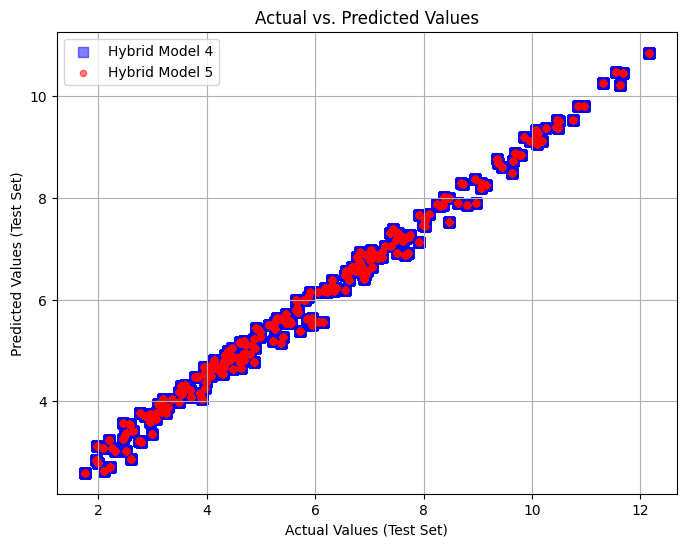

In [45]:
import matplotlib.pyplot as plt

# Assuming you already have the actual and predicted values for both models
actual_hybrid4_test = y_test
predicted_hybrid4_test = hybrid4_pred_test

actual_hybrid5_test = y_test
predicted_hybrid5_test = hybrid5_pred_test

# Create a scatter plot for both models on the same graph
plt.figure(figsize=(8, 6))

# Scatter plot for Hybrid Model 4
plt.scatter(actual_hybrid4_test, predicted_hybrid4_test, alpha=0.5, color='blue', label='Hybrid Model 4', marker='s', s=50)

# Scatter plot for Hybrid Model 5
plt.scatter(actual_hybrid5_test, predicted_hybrid5_test, alpha=0.5, color='red', label='Hybrid Model 5', marker='o', s=20)

plt.xlabel('Actual Values (Test Set)')
plt.ylabel('Predicted Values (Test Set)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


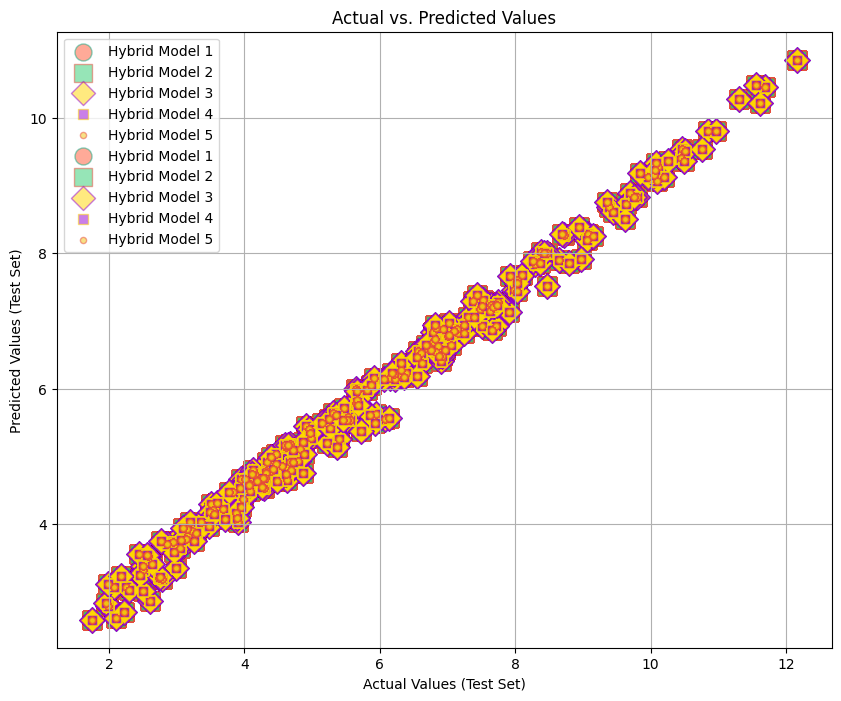

In [46]:
import matplotlib.pyplot as plt

# Assuming you have actual and predicted values for each hybrid model
# Replace the variables below with your actual variable names

# Hybrid Model 1 (XGB + CatBoost + GBR + Ridge)
actual_hybrid1_test = y_test
predicted_hybrid1_test = hybrid5_pred_test  # Replace with the actual variable name

# Hybrid Model 2 (GBR + CatBoost)
actual_hybrid2_test = y_test
predicted_hybrid2_test = hybrid4_pred_test  # Replace with the actual variable name

# Hybrid Model 3 (Ridge + LWLR)
actual_hybrid3_test = y_test
predicted_hybrid3_test = hybrid4_pred_test  # Replace with the actual variable name

# Create a scatter plot for all models on the same graph
plt.figure(figsize=(10, 8))

# Scatter plot for Hybrid Model 1
plt.scatter(actual_hybrid1_test, predicted_hybrid1_test, alpha=0.5, color='#FF5733', edgecolors='#10A881', label='Hybrid Model 1', marker='o', s=150)

# Scatter plot for Hybrid Model 2
plt.scatter(actual_hybrid2_test, predicted_hybrid2_test, alpha=0.5, color='#2ECC71', edgecolors='#E74C3C', label='Hybrid Model 2', marker='s', s=150)

# Scatter plot for Hybrid Model 3
plt.scatter(actual_hybrid3_test, predicted_hybrid3_test, alpha=0.5, color='#FFD700', edgecolors='#9400D3', label='Hybrid Model 3', marker='D', s=150)

# Scatter plot for Hybrid Model 4
plt.scatter(actual_hybrid4_test, predicted_hybrid4_test, alpha=0.5, color='#9400D3', edgecolors='#FFD700', label='Hybrid Model 4', marker='s', s=50)

# Scatter plot for Hybrid Model 5
plt.scatter(actual_hybrid5_test, predicted_hybrid5_test, alpha=0.5, color='#F1C40F', edgecolors='#E74C3C', label='Hybrid Model 5', marker='o', s=20)



# Scatter plot for Hybrid Model 1
plt.scatter(actual_hybrid1_test, predicted_hybrid1_test, alpha=0.5, color='#FF5733', edgecolors='#10A881', label='Hybrid Model 1', marker='o', s=150)

# Scatter plot for Hybrid Model 2
plt.scatter(actual_hybrid2_test, predicted_hybrid2_test, alpha=0.5, color='#2ECC71', edgecolors='#E74C3C', label='Hybrid Model 2', marker='s', s=150)

# Scatter plot for Hybrid Model 3
plt.scatter(actual_hybrid3_test, predicted_hybrid3_test, alpha=0.5, color='#FFD700', edgecolors='#9400D3', label='Hybrid Model 3', marker='D', s=150)

# Scatter plot for Hybrid Model 4
plt.scatter(actual_hybrid4_test, predicted_hybrid4_test, alpha=0.5, color='#9400D3', edgecolors='#FFD700', label='Hybrid Model 4', marker='s', s=50)

# Scatter plot for Hybrid Model 5
plt.scatter(actual_hybrid5_test, predicted_hybrid5_test, alpha=0.5, color='#F1C40F', edgecolors='#E74C3C', label='Hybrid Model 5', marker='o', s=20)

plt.xlabel('Actual Values (Test Set)')
plt.xlabel('Actual Values (Test Set)')
plt.ylabel('Predicted Values (Test Set)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


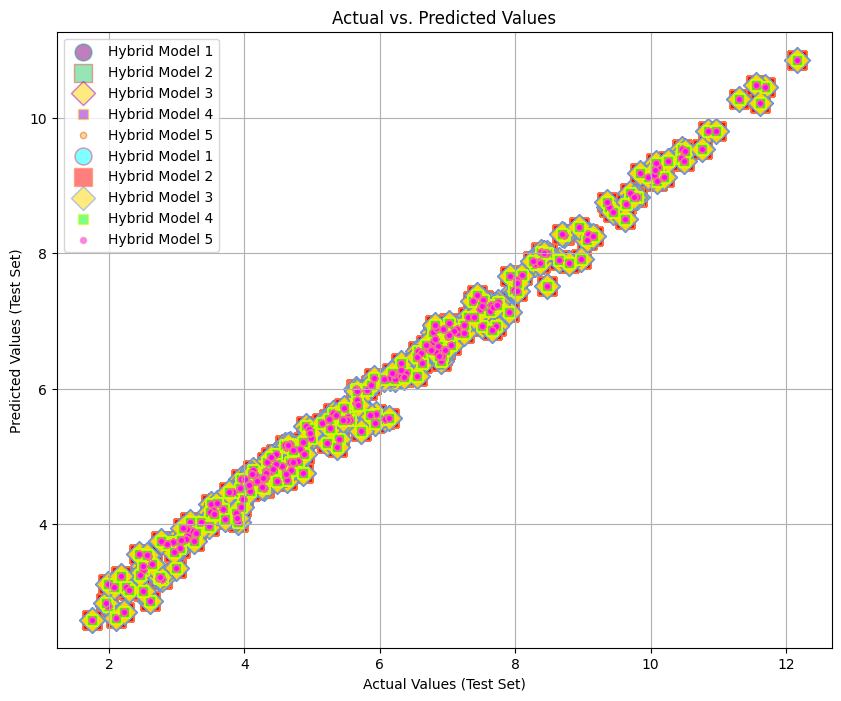

In [47]:
import matplotlib.pyplot as plt

# Assuming you have actual and predicted values for each hybrid model
# Replace the variables below with your actual variable names

# Hybrid Model 1 (XGB + CatBoost + GBR + Ridge)
actual_hybrid1_test = y_test
predicted_hybrid1_test = hybrid5_pred_test  # Replace with the actual variable name

# Hybrid Model 2 (GBR + CatBoost)
actual_hybrid2_test = y_test
predicted_hybrid2_test = hybrid4_pred_test  # Replace with the actual variable name

# Hybrid Model 3 (Ridge + LWLR)
actual_hybrid3_test = y_test
predicted_hybrid3_test = hybrid4_pred_test  # Replace with the actual variable name

# Create a scatter plot for all models on the same graph
plt.figure(figsize=(10, 8))

# Scatter plot for Hybrid Model 1
plt.scatter(actual_hybrid1_test, predicted_hybrid1_test, alpha=0.5, color='#800080', edgecolors='#10A881', label='Hybrid Model 1', marker='o', s=150)

# Scatter plot for Hybrid Model 2
plt.scatter(actual_hybrid2_test, predicted_hybrid2_test, alpha=0.5, color='#2ECC71', edgecolors='#E74C3C', label='Hybrid Model 2', marker='s', s=150)

# Scatter plot for Hybrid Model 3
plt.scatter(actual_hybrid3_test, predicted_hybrid3_test, alpha=0.5, color='#FFD700', edgecolors='#9400D3', label='Hybrid Model 3', marker='D', s=150)

# Scatter plot for Hybrid Model 4
plt.scatter(actual_hybrid4_test, predicted_hybrid4_test, alpha=0.5, color='#9400D3', edgecolors='#FFD700', label='Hybrid Model 4', marker='s', s=50)

# Scatter plot for Hybrid Model 5
plt.scatter(actual_hybrid5_test, predicted_hybrid5_test, alpha=0.5, color='#F1C40F', edgecolors='#E74C3C', label='Hybrid Model 5', marker='o', s=20)



# Scatter plot for Hybrid Model 1
plt.scatter(actual_hybrid1_test, predicted_hybrid1_test, alpha=0.5, color='#00FFFF', edgecolors='#DE3163', label='Hybrid Model 1', marker='o', s=150)

# Scatter plot for Hybrid Model 2
plt.scatter(actual_hybrid2_test, predicted_hybrid2_test, alpha=0.5, color='#FF0000', edgecolors='#FF7F50', label='Hybrid Model 2', marker='s', s=150)

# Scatter plot for Hybrid Model 3
plt.scatter(actual_hybrid3_test, predicted_hybrid3_test, alpha=0.5, color='#FFD700', edgecolors='#6495ED', label='Hybrid Model 3', marker='D', s=150)

# Scatter plot for Hybrid Model 4
plt.scatter(actual_hybrid4_test, predicted_hybrid4_test, alpha=0.5, color='#00FF00', edgecolors='#DFFF00', label='Hybrid Model 4', marker='s', s=50)

# Scatter plot for Hybrid Model 5
plt.scatter(actual_hybrid5_test, predicted_hybrid5_test, alpha=0.5, color='#FF00FF', edgecolors='#F08080', label='Hybrid Model 5', marker='o', s=20)

plt.xlabel('Actual Values (Test Set)')
plt.xlabel('Actual Values (Test Set)')
plt.ylabel('Predicted Values (Test Set)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
